# Notas

## Ler os Dados

In [1]:
# Defining Global Variables
DATA_FOLDER = 'data'
WORLD_DATA_FILE = 'world-data.csv'

# import the necessary dependencies
import pandas as pd

# creating custom date parser (mm/dd/yy)
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, '%m/%d/%y')

# re-read csv
covid_world_dataframe = pd.read_csv(f'{DATA_FOLDER}/{WORLD_DATA_FILE}', parse_dates=['Date'], date_parser=custom_date_parser)
covid_world_dataframe.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


## Tratamento dos Dados

### Correção de Problemas

### Problemas
 1. Alguns Paises não tem `Province/State`
 2. Os que têm `Province/State` também têm `Lat` e `Long` diferentes
 3. Os que têm `Province/State` também têm `Confirmed`, `Deaths` e `Recovered` para esse `Province/State`
 
### Solução
 1. Agrupar os dados por `Country/Region` e `Date`
 2. Fazer a média dentro do mesmo país
 3. Somar todos os casos das `Province/State` e colocar esse valor no país

In [2]:
# remover coluna 'Province/State'
covid_world_dataframe = covid_world_dataframe.drop(labels=['Province/State'], axis=1)
covid_world_dataframe.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [3]:
# Calcular novas 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered'
aggregation_functions = {
    # Calculate the average latitude and longitude
    'Lat': 'mean',
    'Long': 'mean',
    # Calculate the sum of confirmed cases, deaths and recovered of the day
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}
# group by country and date
covid_world_dataframe = covid_world_dataframe.groupby(['Date', 'Country/Region']).aggregate(aggregation_functions)
covid_world_dataframe.head()

Lat     Long  Confirmed  Deaths  Recovered
Date       Country/Region                                                
2020-01-22 Afghanistan     33.0000  65.0000          0       0          0
           Albania         41.1533  20.1683          0       0          0
           Algeria         28.0339   1.6596          0       0          0
           Andorra         42.5063   1.5218          0       0          0
           Angola         -11.2027  17.8739          0       0          0

Graças ao `groupby(['Date', 'Country/Region']` o indice das tabelas é o multi indice `[Date, Country/Region]`. Vamos voltar ao estado inicial:

```python
# Remover um indice específico, neste caso Country/Region
covid_world_dataframe = covid_world_dataframe.reset_index(level=['Country/Region'])
# Remover todos os indices
covid_world_dataframe = covid_world_dataframe.reset_index()
# ou
covid_world_dataframe.reset_index(inplace=True)
```

In [4]:
covid_world_dataframe = covid_world_dataframe.reset_index()
covid_world_dataframe.head()

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,Afghanistan,33.0000,65.0000,0,0,0
1,2020-01-22,Albania,41.1533,20.1683,0,0,0
2,2020-01-22,Algeria,28.0339,1.6596,0,0,0
3,2020-01-22,Andorra,42.5063,1.5218,0,0,0
4,2020-01-22,Angola,-11.2027,17.8739,0,0,0


### Filtragem de Dados

Vamos filtrar apenas os Estados Unidos *(US)*, Reino Unido *(United Kingdom)*, China *(China)* e Portugal *(Portugal)*

In [5]:
# filter
countries = ['US', 'United Kingdom', 'China', 'Portugal']
covid_filtered_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'].isin(countries)]
covid_filtered_dataframe.head(8)

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
36,2020-01-22,China,32.828385,111.649082,548,17,28
135,2020-01-22,Portugal,39.399900,-8.224500,0,0,0
173,2020-01-22,US,37.090200,-95.712900,1,0,0
177,2020-01-22,United Kingdom,24.548173,-43.902245,0,0,0
223,2020-01-23,China,32.828385,111.649082,643,18,30
322,2020-01-23,Portugal,39.399900,-8.224500,0,0,0
360,2020-01-23,US,37.090200,-95.712900,1,0,0
364,2020-01-23,United Kingdom,24.548173,-43.902245,0,0,0


### Plotting

Com os novos dados filtrados, vamos fazer um [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html), para conseguirmos comparar os casos confirmados, mortos e recuperados.

''

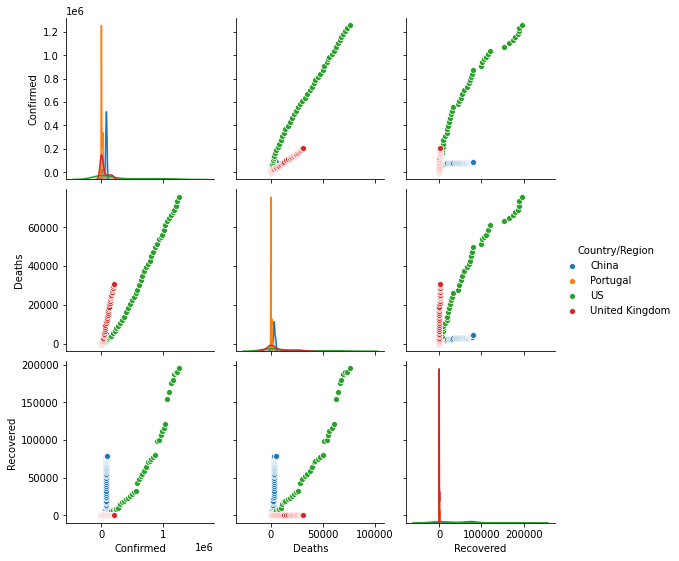

In [7]:
# plot
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(covid_filtered_dataframe, hue='Country/Region', vars=['Confirmed', 'Deaths', 'Recovered'])
;

Vamos comparar os casos em Portugal ao longo do tempo

In [8]:
# create portgual dataframe
covid_portugal_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'Portugal']
covid_portugal_dataframe.head()

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
135,2020-01-22,Portugal,39.3999,-8.2245,0,0,0
322,2020-01-23,Portugal,39.3999,-8.2245,0,0,0
509,2020-01-24,Portugal,39.3999,-8.2245,0,0,0
696,2020-01-25,Portugal,39.3999,-8.2245,0,0,0
883,2020-01-26,Portugal,39.3999,-8.2245,0,0,0


A forma mais facil de usar as datas como eixo horizontal é simplesmente torná-las como índice. O que até faz sentido uma vez que são unicas para cada país.

In [9]:
# set date as index and drop column
covid_portugal_dataframe.set_index('Date', inplace=True, drop=True)
covid_portugal_dataframe.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,,
2020-01-22,Portugal,39.3999,-8.2245,0,0,0
2020-01-23,Portugal,39.3999,-8.2245,0,0,0
2020-01-24,Portugal,39.3999,-8.2245,0,0,0
2020-01-25,Portugal,39.3999,-8.2245,0,0,0
2020-01-26,Portugal,39.3999,-8.2245,0,0,0


''

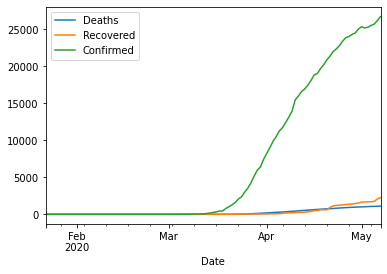

In [10]:
covid_portugal_dataframe[['Deaths', 'Recovered', 'Confirmed']].plot()
;

No entanto se quisermos usar explicitamente o **seaborn** (o que é obvio que queremos). Devemos usar o método `melt` e fazer reset ao indice.

In [11]:
covid_portugal_dataframe = covid_portugal_dataframe.reset_index()
covid_portugal_dataframe.head()

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,Portugal,39.3999,-8.2245,0,0,0
1,2020-01-23,Portugal,39.3999,-8.2245,0,0,0
2,2020-01-24,Portugal,39.3999,-8.2245,0,0,0
3,2020-01-25,Portugal,39.3999,-8.2245,0,0,0
4,2020-01-26,Portugal,39.3999,-8.2245,0,0,0


In [20]:
covid_portugal_dataframe_melt = pd.melt(covid_portugal_dataframe, ['Date', 'Country/Region', 'Lat', 'Long'], value_name='Count')
covid_portugal_dataframe_melt

,Date,Country/Region,Lat,Long,variable,Count
0,2020-01-22,Portugal,39.3999,-8.2245,Confirmed,0
1,2020-01-23,Portugal,39.3999,-8.2245,Confirmed,0
2,2020-01-24,Portugal,39.3999,-8.2245,Confirmed,0
3,2020-01-25,Portugal,39.3999,-8.2245,Confirmed,0
4,2020-01-26,Portugal,39.3999,-8.2245,Confirmed,0
...,...,...,...,...,...,...
316,2020-05-03,Portugal,39.3999,-8.2245,Recovered,1689
317,2020-05-04,Portugal,39.3999,-8.2245,Recovered,1712
318,2020-05-05,Portugal,39.3999,-8.2245,Recovered,1743
319,2020-05-06,Portugal,39.3999,-8.2245,Recovered,2076


''

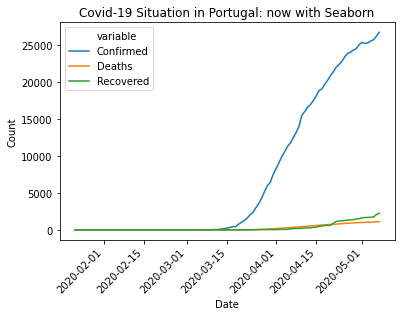

In [21]:
ax = sb.lineplot(x='Date', y='Count', hue='variable', data=covid_portugal_dataframe_melt)
ax.set_title('Covid-19 Situation in Portugal: now with Seaborn')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
;

Caso queiremos ver os gráficos separamente (usando **seaborn**)::

''

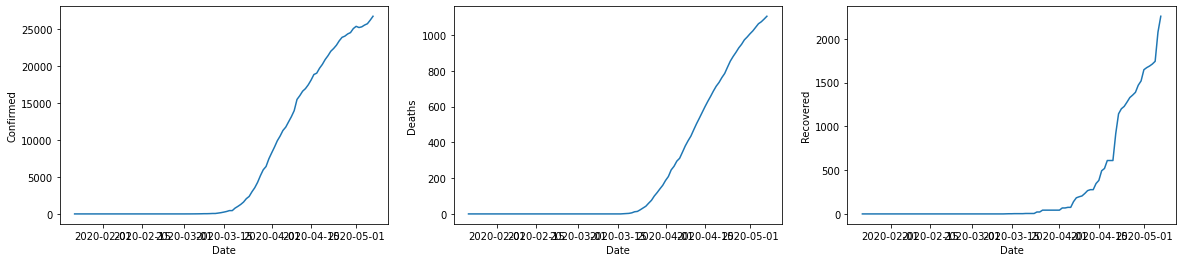

In [22]:
# criar area de plot
plt.figure(figsize=(20, 4))
# subplot de confirmed
plt.subplot(1, 3, 1)
sb.lineplot(x='Date', y='Confirmed', data=covid_portugal_dataframe)
# subplot de deaths
plt.subplot(1, 3, 2)
sb.lineplot(x='Date', y='Deaths', data=covid_portugal_dataframe)
# subplot de recovered
plt.subplot(1, 3, 3)
sb.lineplot(x='Date', y='Recovered', data=covid_portugal_dataframe)
# mostrar plot (nao necessario)
plt.draw()
;

Vamos comparar os 4 paises incialmente filtrados

Comparando casos confirmados entre os 4 paises

In [15]:
# create new dataset for chosen countries
confirmed_dataframe = covid_filtered_dataframe[['Date']].copy()
confirmed_dataframe.drop_duplicates(inplace=True)

def get_country_victims(country: str, victims: str):
    return covid_filtered_dataframe.loc[covid_filtered_dataframe['Country/Region'] == country , victims].tolist()

confirmed_dataframe['Portugal'] = get_country_victims('Portugal', 'Confirmed')
confirmed_dataframe['US'] = get_country_victims('US', 'Confirmed')
confirmed_dataframe['United Kingdom'] = get_country_victims('United Kingdom', 'Confirmed')
confirmed_dataframe['China'] = get_country_victims('China', 'Confirmed')
confirmed_dataframe

,Date,Portugal,US,United Kingdom,China
36,2020-01-22,0,1,0,548
223,2020-01-23,0,1,0,643
410,2020-01-24,0,2,0,920
597,2020-01-25,0,2,0,1406
784,2020-01-26,0,5,0,2075
...,...,...,...,...,...
19110,2020-05-03,25282,1158040,187842,83964
19297,2020-05-04,25524,1180375,191832,83966
19484,2020-05-05,25702,1204351,196243,83968
19671,2020-05-06,26182,1228603,202359,83970


''

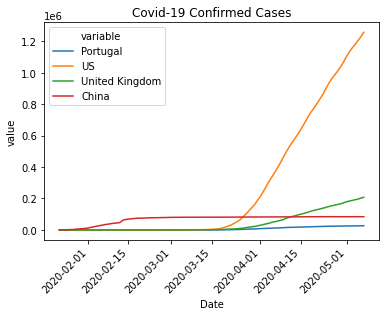

In [16]:
confirmed_dataframe_melt = pd.melt(confirmed_dataframe, ['Date'])
ax = sb.lineplot(x='Date', y='value', hue='variable', data=confirmed_dataframe_melt)
ax.set_title('Covid-19 Confirmed Cases')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
;

Agora vamos ver a curva de casos confirmados destes 4 paises

In [18]:
# create portugal dataframe
# already done
# create US dataframe
covid_us_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'US']
# create UK dataframe
covid_uk_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'United Kingdom']
# create China dataframe
covid_china_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'China']

''

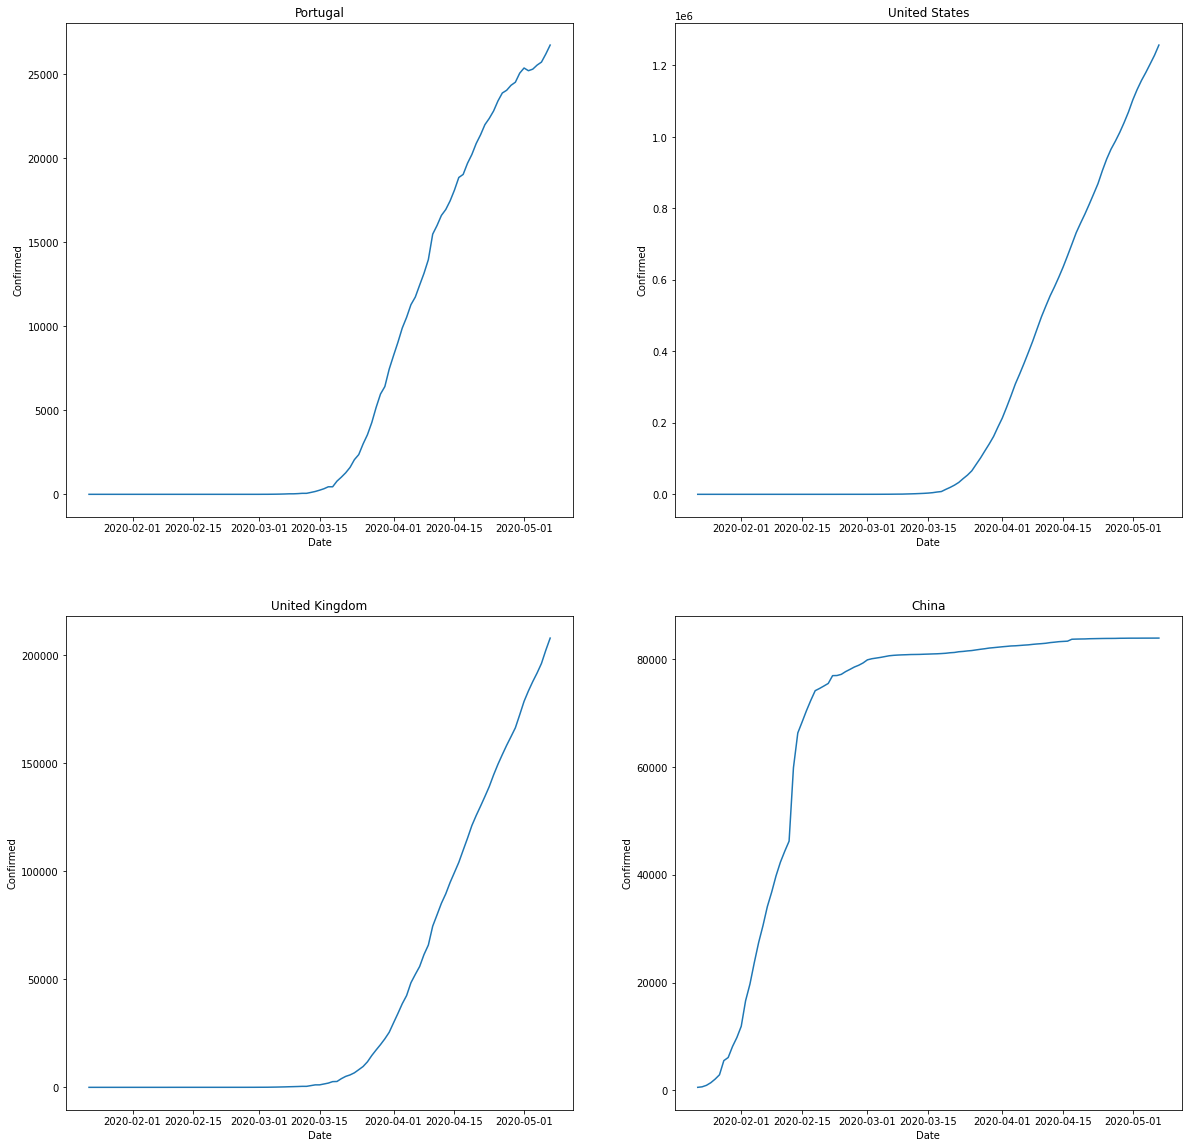

In [23]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sb.lineplot(x='Date', y='Confirmed', data=covid_portugal_dataframe).set_title('Portugal')
plt.subplot(2, 2, 2)
sb.lineplot(x='Date', y='Confirmed', data=covid_us_dataframe).set_title('United States')
plt.subplot(2, 2, 3)
sb.lineplot(x='Date', y='Confirmed', data=covid_uk_dataframe).set_title('United Kingdom')
plt.subplot(2, 2, 4)
sb.lineplot(x='Date', y='Confirmed', data=covid_china_dataframe).set_title('China')
;